<a href="https://colab.research.google.com/github/Avery1493/Lending-Club/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lending Club

In [215]:
# Imports 
import numpy as np
import pandas as pd
# print(pd.__version__)
# !pip freeze |grep pandas
file_1_url = "https://raw.githubusercontent.com/Avery1493/Lending-Club/master/Data/LC2019Q3_Paid_or_Charged_Off"
file_2_url = "https://raw.githubusercontent.com/Avery1493/Lending-Club/master/Data/LC2019Q4_Paid_or_Charged_Off"

In [152]:
# CURL SHELL COMMAND -- fast way to see raw contents of a file
#!curl https://raw.githubusercontent.com/Avery1493/Lending-Club/master/Data/LC2019Q3_Paid_or_Charged_Off

In [216]:
# Read in CSVs
#help(pd.read_csv)
#?pd.read_csv
df = pd.read_csv(file_1_url)
df2 = pd.read_csv(file_1_url)
print(df.shape)
print(df2.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (144,145,146) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(8409, 150)
(8409, 150)


In [217]:
# Concat dataframes
df = pd.concat([df,df2])
print(df.shape)
df.reset_index().tail(5)

(16818, 150)


,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
16813,8404,154311563,NaN,6000,6000,6000.0,36 months,20.00%,222.99,D,D2,Sales Manager,10+ years,OWN,120000.0,Not Verified,Jul-2019,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,medical,Medical expenses,707xx,LA,25.14,0,Dec-2001,705,709,0,NaN,NaN,8,0,18852,83.4%,19,w,0.0,0.0,6333.814970,6333.81,6000.00,333.81,0.0,0.0,0.0,Oct-2019,5897.83,NaN,Oct-2019,689,685,0,NaN,1,Individual,NaN,NaN,NaN,0,0,217355,0,4,1,4,8.0,60958,72.0,1,1,7250,75.0,22600,2,3,1,6,27169.0,3202.0,81.8,0,0,115.0,210,7,7,4,7.0,NaN,8.0,NaN,0,2,3,2,3,11,3,4,3,8,0.0,0,0,2,100.0,100.0,0,0,251077,79810,17600,84477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
16814,8405,153817414,NaN,12000,12000,12000.0,60 months,15.24%,287.00,C,C2,Letter Carrier,6 years,MORTGAGE,65000.0,Not Verified,Jul-2019,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,441xx,OH,15.75,0,Dec-2006,710,714,0,31.0,NaN,8,0,1317,15.7%,18,w,0.0,0.0,12520.400076,12520.40,12000.00,520.40,0.0,0.0,0.0,Oct-2019,11956.56,NaN,Oct-2019,684,680,0,31.0,1,Individual,NaN,NaN,NaN,0,0,121967,0,2,2,2,7.0,22602,82.0,0,0,605,66.0,8400,2,0,4,2,15246.0,4395.0,12.1,0,0,150.0,150,25,7,1,142.0,NaN,7.0,NaN,1,1,2,2,3,10,5,7,2,8,0.0,0,0,2,94.4,0.0,0,0,143312,23919,5000,27655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
16815,8406,154053832,NaN,15000,15000,15000.0,36 months,8.81%,475.68,A,A5,NaN,NaN,MORTGAGE,42000.

#Cleaning Data


In [218]:
# Reducing features
df = df[["funded_amnt", "installment", "term", "int_rate", "emp_title", "emp_length", 
    "home_ownership", "annual_inc", "title","grade", "fico_range_high", 
    "revol_util", "mths_since_last_delinq", "loan_status"]]
df.head()

,funded_amnt,installment,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,title,grade,fico_range_high,revol_util,mths_since_last_delinq,loan_status
0,16000,325.88,60 months,8.19%,Business Agent,2 years,MORTGAGE,116000.0,Credit card refinancing,A,724,20.7%,NaN,Fully Paid
1,1800,64.84,36 months,17.74%,Utility,4 years,MORTGAGE,70000.0,Medical expenses,C,704,19.6%,23.0,Fully Paid
2,10000,324.23,36 months,10.33%,NaN,< 1 year,RENT,59300.0,Debt consolidation,B,724,8.9%,41.0,Fully Paid
3,25000,1044.93,36 months,28.80%,traffic cordinator,10+ years,MORTGAGE,80000.0,Debt consolidation,D,699,85.9%,NaN,Fully Paid
4,8000,259.38,36 months,10.33%,Processing Manager,6 years,MORTGAGE,116600.0,Debt consolidation,B,704,55%,NaN,Fully Paid


In [219]:
# Cleaning
# Fill Nans
df['emp_length'].fillna("1", inplace = True)
df['revol_util'].fillna("0%", inplace = True)

def obj_term_to_int(cell_contents):
  return int(cell_contents.strip(" months"))
def obj_rate_to_float(cell_contents):
  return float(cell_contents.strip("%"))
def obj_len_to_int(cell_contents):
  return int(cell_contents.strip(" years").strip("< ").strip("+"))
def clean_title(cell_contents):
  if isinstance(cell_contents, str):
    return cell_contents.strip().title()
  else: 
    return "Unknown"

df["term"] = df["term"].apply(obj_term_to_int)
df["int_rate"] = df["int_rate"].apply(obj_rate_to_float)
df["revol_util"] = df["revol_util"].apply(obj_rate_to_float)
df['emp_length'] = df['emp_length'].apply(obj_len_to_int)
df["emp_title"] = df["emp_title"].apply(clean_title)
df['emp_title'] = df['emp_title'].replace("Rn", "Registered Nurse")
df["annual_inc"] = df["annual_inc"]/1000

In [221]:
df.dtypes

funded_amnt                 int64
installment               float64
term                        int64
int_rate                  float64
emp_title                  object
emp_length                  int64
home_ownership             object
annual_inc                float64
title                      object
grade                      object
fico_range_high             int64
revol_util                float64
mths_since_last_delinq    float64
loan_status                object
dtype: object

In [220]:
df.describe()

,funded_amnt,installment,term,int_rate,emp_length,annual_inc,fico_range_high,revol_util,mths_since_last_delinq
count,16818.000000,16818.000000,16818.000000,16818.000000,16818.000000,16818.000000,16818.000000,16818.000000,7328.000000
mean,14140.923415,423.293211,42.210489,13.628699,5.549174,89.684815,716.806874,37.302925,37.587336
std,9902.307155,286.173272,10.511333,5.369850,3.721818,134.466275,38.165494,25.815071,21.984436
min,1000.000000,30.890000,36.000000,6.460000,1.000000,0.000000,664.000000,0.000000,1.000000
25%,6375.000000,213.050000,36.000000,8.810000,2.000000,50.000000,684.000000,16.300000,19.000000
50%,11500.000000,348.650000,36.000000,12.400000,5.000000,72.000000,709.000000,33.100000,35.000000
75%,20000.000000,565.640000,60.000000,16.950000,10.000000,102.304000,739.000000,55.400000,55.000000
max,40000.000000,1604.180000,60.000000,28.800000,10.000000,7272.644000,850.000000,112.800000,160.000000


In [222]:
df.describe(exclude="number")

,emp_title,home_ownership,title,grade,loan_status
count,16818,16818,16818,16818,16818
unique,3946,4,12,4,2
top,Unknown,MORTGAGE,Debt consolidation,B,Fully Paid
freq,1920,8988,8720,4972,16052


In [223]:
pd.crosstab(df["home_ownership"], df["emp_length"])

emp_length,1,2,3,4,5,6,7,8,9,10
home_ownership,,,,,,,,,,
ANY,4,0,0,0,0,0,0,0,0,0
MORTGAGE,1820,564,576,500,626,442,308,338,262,3552
OWN,600,160,160,94,126,104,80,68,48,718
RENT,1668,642,544,362,420,252,204,158,136,1282


In [224]:
df.isnull().sum()

funded_amnt                  0
installment                  0
term                         0
int_rate                     0
emp_title                    0
emp_length                   0
home_ownership               0
annual_inc                   0
title                        0
grade                        0
fico_range_high              0
revol_util                   0
mths_since_last_delinq    9490
loan_status                  0
dtype: int64

# Plots

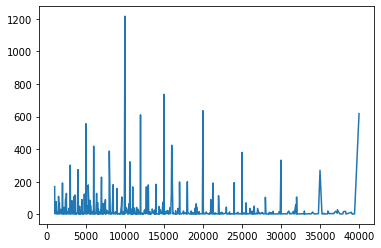

In [226]:
#plot(kind="barh");
#plot.density()
#plot.scatter("","")
#.hist();
#pd.crosstab().plot();
# decending order / order by index 
df["funded_amnt"].value_counts().sort_index().plot();

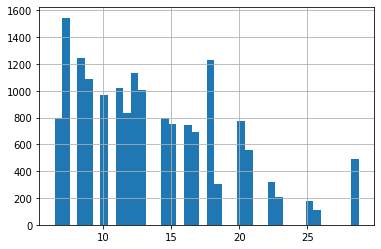

In [227]:
df["int_rate"].hist(bins = 40);

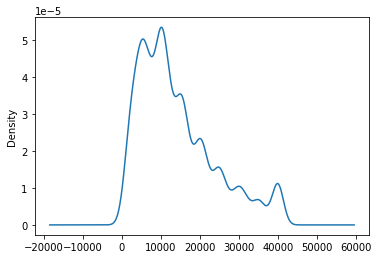

In [228]:
df["funded_amnt"].plot.density();

# Statistical Tests

In [229]:
df.sample(5)

,funded_amnt,installment,term,int_rate,emp_title,emp_length,home_ownership,annual_inc,title,grade,fico_range_high,revol_util,mths_since_last_delinq,loan_status
1361,1000,33.41,36,12.40,Ssgt,10,RENT,55.0,Credit card refinancing,B,719,9.2,59.0,Fully Paid
7617,15000,596.40,36,25.00,Billing/Payroll,10,OWN,64.4,Debt consolidation,D,669,60.5,9.0,Fully Paid
6047,5000,185.82,36,20.00,Custom Protective Officer,1,RENT,48.5,Debt consolidation,D,684,33.5,32.0,Fully Paid
658,40000,975.28,60,16.12,V.P.,5,MORTGAGE,350.0,Debt consolidation,C,684,32.0,NaN,Fully Paid
6068,25000,994.00,36,25.00,Senior Trader,10,OWN,1500.0,Credit card refinancing,D,684,88.5,6.0,Fully Paid
